In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.array([[0, 0],
              [1, 1],
              [1, 0],
              [0, 1]])
y = np.array([0, 0, 1, 1])

In [4]:
from sklearn.neural_network import MLPClassifier

model0 = MLPClassifier(activation = 'logistic',
                       solver = 'lbfgs',
                       max_iter = 100,
                       hidden_layer_sizes= [],
                       random_state = 0)

model0.fit(X, y)
y_hat0 = model0.predict(X)

print("weights: {}\nBias: {}".format(model0.coefs_, model0.intercepts_))

weights: [array([[ 1.64913163e-04],
       [-3.40235862e-05]])]
Bias: [array([1.04251981e-05])]


In [5]:
y_hat0

array([1, 1, 1, 0])

In [6]:
model1 = MLPClassifier(activation = 'logistic',
                       solver = 'lbfgs',
                       max_iter = 100,
                       hidden_layer_sizes = (2,),
                       random_state = 0)

model1.fit(X, y)
y_hat1 = model1.predict(X)

weights = model1.coefs_
bias = model1.intercepts_

print("weights: {}\nBias: {}".format(weights, bias))

weights: [array([[-6.77800873,  6.41517868],
       [-6.85166173,  6.30993013]]), array([[14.09816298],
       [14.09027917]])]
Bias: [array([10.7517662 , -2.81729815]), array([-21.20012772])]


In [7]:
def sigmoid(X) :
  result = 1 / (1 + np.exp(-X))
  return result

In [8]:
b11 = weights[0][0][0] * X[:, 0] + weights[0][0][1] * X[:, 1]

b11_act = sigmoid(b11)

b12 = weights[0][1][0] * X[:, 0] + weights[0][1][1] * X[:, 1]

b12_act = sigmoid(b12)

print("b11_act: {}\nb12_act: {}".format(b11_act, b12_act))

b11_act: [0.5        0.41027466 0.00113724 0.99836615]
b12_act: [0.5        0.36778486 0.00105658 0.99818514]


In [9]:
y_hat1

array([0, 0, 1, 1])

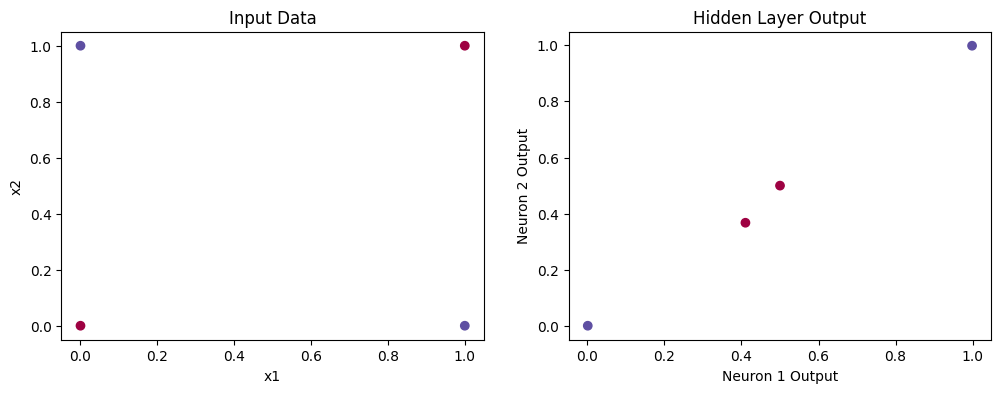

In [12]:
# 4개의 학습데이터 샘플을 첫 번째 좌표평면에 나타냄
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Input Data')
plt.xlabel('x1')
plt.ylabel('x2')

# 2)-C에서 구한 히든 레이어에서의 출력 값들을 두 번째 좌표평면에 나타냄
plt.subplot(1, 2, 2)
plt.scatter(b11_act, b12_act, c=y, cmap=plt.cm.Spectral)
plt.title('Hidden Layer Output')
plt.xlabel('Neuron 1 Output')
plt.ylabel('Neuron 2 Output')

# 그래프 표시
plt.show()